<a href="https://colab.research.google.com/github/SEscalanteE/Ejercicios-de-Inteligencia-Artificial/blob/main/Ejercicio_de_Var_autoencoders_and_gans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Carlos Altamiranda

*   Sofia Escalante



Conclusiones:

La inclusión de regularización L1 y L2 en las capas densas ayuda a mejorar la capacidad de generalización del modelo al penalizar los pesos grandes. Esto se refleja en una mejora en la pérdida.
Cambiar el optimizador de SGD a Adam muestra una mejora significativa en los resultados. Adam es conocido por su eficiencia en la optimización y suele converger más rápidamente que SGD, lo que resulta en un mejor rendimiento del modelo.
La adición de Dropout del 20% entre las capas densas ha demostrado ser beneficiosa para mejorar la generalización del modelo y prevenir el sobreajuste. Esto se traduce en una mayor precisión en los datos de validación.
Utilizar la pérdida de error absoluto medio (mean absolute error) es una opción válida y práctica, ya que proporciona una medida directa de la discrepancia entre las predicciones del modelo y los valores reales. Además, puede ser más intuitiva para interpretar en algunos casos.
En cuanto al número de épocas, aunque una cantidad mayor podría permitir que el modelo continúe aprendiendo y mejore su rendimiento, una cantidad mínima de 10 épocas proporciona un buen equilibrio entre el tiempo de entrenamiento y la calidad de los resultados obtenidos.
En resumen, la combinación de regularización, cambio de optimizador, Dropout y elección de la función de pérdida puede tener un impacto significativo en el rendimiento del modelo. Es importante experimentar con diferentes configuraciones para encontrar la combinación óptima que se ajuste mejor a los datos y al problema específico que se está abordando.



# Generative models

In [ ]:
import sklearn
import tensorflow as tf
from tensorflow import keras


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Graficar imágenes:

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# PCA como un autoencoder lineal

In [ ]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

Definir autoencoder:

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 3s 19ms/step - loss: 0.6458
Epoch 2/20
2/2 [==============================] - 0s 19ms/step - loss: 0.0592
Epoch 3/20
2/2 [==============================] - 0s 11ms/step - loss: 0.0667
Epoch 4/20
2/2 [==============================] - 0s 13ms/step - loss: 0.2800
Epoch 5/20
2/2 [==============================] - 0s 33ms/step - loss: 0.5676
Epoch 6/20
2/2 [==============================] - 0s 9ms/step - loss: 0.0868
Epoch 7/20
2/2 [==============================] - 0s 12ms/step - loss: 0.0305
Epoch 8/20
2/2 [==============================] - 0s 15ms/step - loss: 0.0117
Epoch 9/20
2/2 [==============================] - 0s 7ms/step - loss: 0.0075
Epoch 10/20
2/2 [==============================] - 0s 27ms/step - loss: 0.0059
Epoch 11/20
2/2 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 12/20
2/2 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 13/20
2/2 [==============================] - 0s 9ms/step - 

In [ ]:
codings = encoder.predict(X_train)

2/2 [==============================] - 0s 9ms/step


Saving figure linear_autoencoder_pca_plot


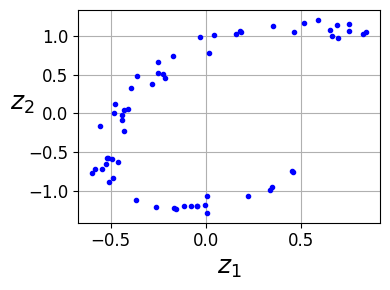

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

# Stacked (Deep) Autoencoders

Utilizando MNIST:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4422102/4422102 [==============================] - 1s 0us/step


Stacked Autoencoder con 3 hidden layers y 1 output layer.

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",# cada pixel como probailidad de membresia, por eso se usa cross entropy, converge mas rapido
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Graficar reconstrucciones:

In [ ]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 [==============================] - 0s 65ms/step
Saving figure reconstruction_plot


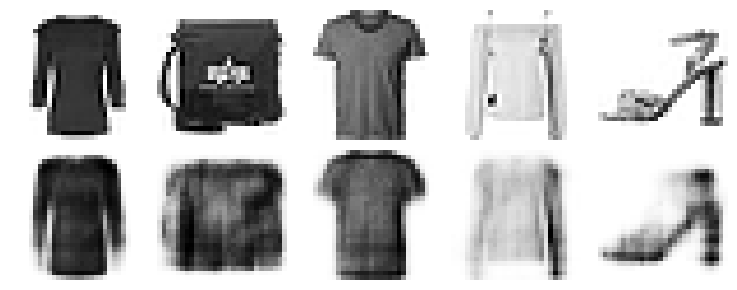

In [ ]:
show_reconstructions(stacked_ae)
save_fig("reconstruction_plot")

# Visualizando Fashion MNIST con tsne desde espacio latente del encoder

In [ ]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min()) #normalizar rango dinamico

157/157 [==============================] - 0s 1ms/step


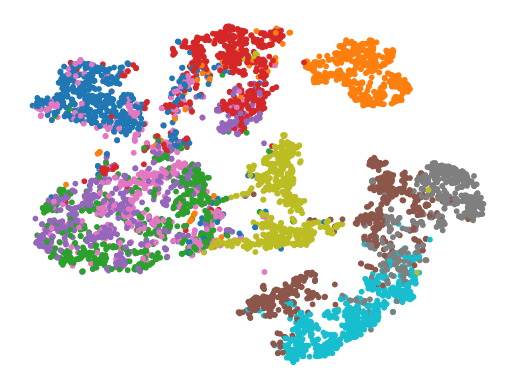

In [ ]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

Saving figure fashion_mnist_visualization_plot


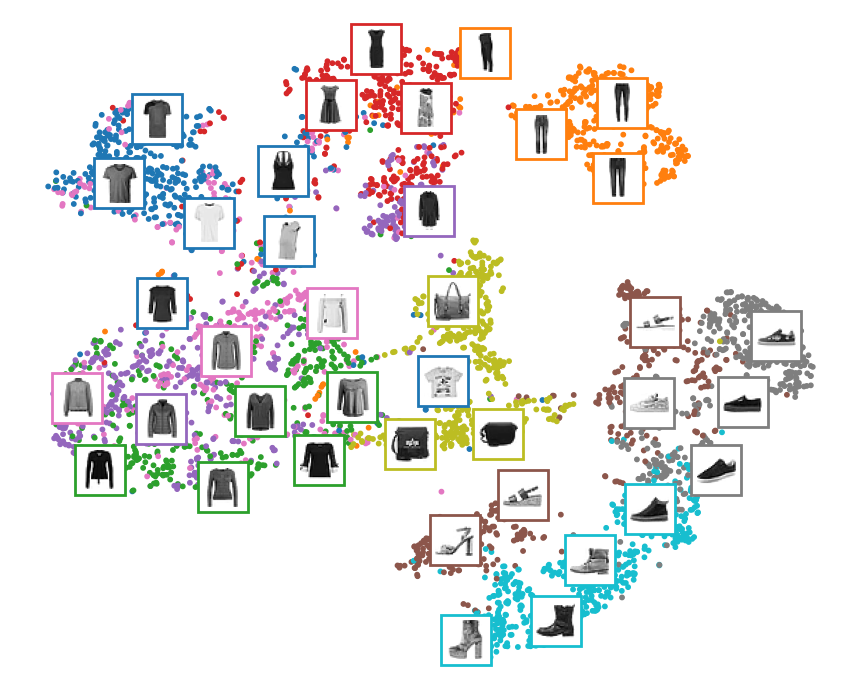

In [ ]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.01: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()

## Tying weights (relacionadar pesos  en encoder y decoder)

Se fijan los pesos del decoder como la transpuesta de los pesos del encoder (relacón directa con pca como reconstructor).

In [ ]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6531 - rounded_accuracy: 0.6197 - val_loss: 0.5966 - val_rounded_accuracy: 0.6973
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5535 - rounded_accuracy: 0.7228 - val_loss: 0.5282 - val_rounded_accuracy: 0.7362
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5127 - rounded_accuracy: 0.7493 - val_loss: 0.4998 - val_rounded_accuracy: 0.7602
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4841 - rounded_accuracy: 0.7731 - val_loss: 0.4712 - val_rounded_accuracy: 0.7802
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4562 - rounded_accuracy: 0.7877 - val_loss: 0.4453 - val_rounded_accuracy: 0.7915
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4320 - rounded_accuracy: 0.7983 - val_loss: 0.4235 - val_rounded_accuracy: 0.8019
Epoch 7/10
1719/1719 [==================

1/1 [==============================] - 0s 64ms/step


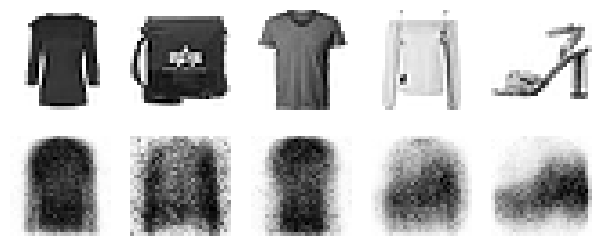

In [ ]:
show_reconstructions(tied_ae)
plt.show()

## Training one Autoencoder at a Time

In [ ]:
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer,
                      n_epochs=10, output_activation=None, metrics=None):
    n_inputs = X_train.shape[-1]
    encoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])
    ])
    decoder = keras.models.Sequential([
        keras.layers.Dense(n_inputs, activation=output_activation),
    ])
    autoencoder = keras.models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer, loss, metrics=metrics)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

K = keras.backend
X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, "binary_crossentropy",
    keras.optimizers.SGD(learning_rate=1.5), output_activation="sigmoid",
    metrics=[rounded_accuracy])
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, "mse", keras.optimizers.SGD(learning_rate=0.05),
    output_activation="selu")

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.3452 - rounded_accuracy: 0.8866 - val_loss: 0.3127 - val_rounded_accuracy: 0.9143
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3044 - rounded_accuracy: 0.9198 - val_loss: 0.3012 - val_rounded_accuracy: 0.9238
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2956 - rounded_accuracy: 0.9279 - val_loss: 0.2942 - val_rounded_accuracy: 0.9306
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2900 - rounded_accuracy: 0.9333 - val_loss: 0.2899 - val_rounded_accuracy: 0.9352
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2865 - rounded_accuracy: 0.9366 - val_loss: 0.2870 - val_rounded_accuracy: 0.9379
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2840 - rounded_accuracy: 0.9390 - val_loss: 0.2848 - val_rounded_accuracy: 0.9394
Epoch 7/10
1719/1719 [==================

In [ ]:
stacked_ae_1_by_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

1/1 [==============================] - 0s 75ms/step


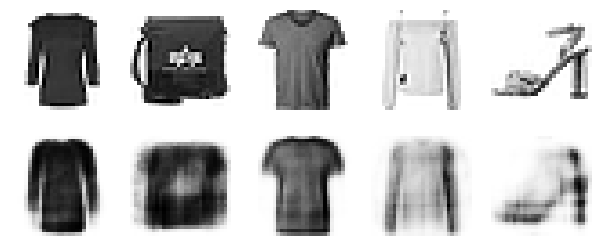

In [ ]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

In [ ]:
stacked_ae_1_by_1.compile(loss="binary_crossentropy",
                          optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=[rounded_accuracy])
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=10,
                                validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2855 - rounded_accuracy: 0.9360 - val_loss: 0.2871 - val_rounded_accuracy: 0.9359
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2852 - rounded_accuracy: 0.9363 - val_loss: 0.2870 - val_rounded_accuracy: 0.9361
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2851 - rounded_accuracy: 0.9364 - val_loss: 0.2868 - val_rounded_accuracy: 0.9362
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2849 - rounded_accuracy: 0.9365 - val_loss: 0.2867 - val_rounded_accuracy: 0.9365
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2848 - rounded_accuracy: 0.9367 - val_loss: 0.2866 - val_rounded_accuracy: 0.9364
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2847 - rounded_accuracy: 0.9368 - val_loss: 0.2865 - val_rounded_accuracy: 0.9363
Epoch 7/10
1719/1719 [==================

1/1 [==============================] - 0s 64ms/step


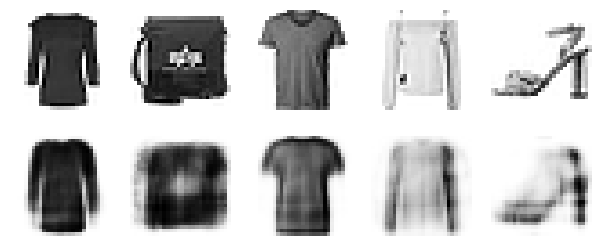

In [ ]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [ ]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 11ms/step - loss: 1.1566
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 1.1135
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 1.0730
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 1.0365
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 1.0020
Epoch 6/20
2/2 [==============================] - 0s 6ms/step - loss: 0.9699
Epoch 7/20
2/2 [==============================] - 0s 7ms/step - loss: 0.9400
Epoch 8/20
2/2 [==============================] - 0s 7ms/step - loss: 0.9122
Epoch 9/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8859
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8613
Epoch 11/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8381
Epoch 12/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8164
Epoch 13/20
2/2 [==============================] - 0s 6ms/step - loss: 0

In [ ]:
codings = encoder.predict(X_train)

2/2 [==============================] - 0s 4ms/step


Saving figure linear_autoencoder_pca_plot


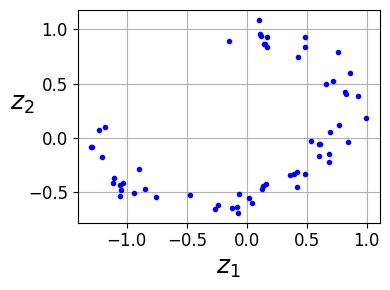

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

# Stacked (Deep) Autoencoders

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

Stacked Autoencoder con 3 hidden layers y 1 output layer.

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dropout(0.3),  # Add dropout layer
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30], kernel_initializer="lecun_normal"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.RMSprop(lr=0.001), metrics=["accuracy"])
history = stacked_ae.fit(X_train, X_train, epochs=15,
                         validation_data=(X_valid, X_valid))

Epoch 1/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3471 - accuracy: 0.0800 - val_loss: 0.3164 - val_accuracy: 0.1023
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3219 - accuracy: 0.0967 - val_loss: 0.3079 - val_accuracy: 0.1094
Epoch 3/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3168 - accuracy: 0.1055 - val_loss: 0.3043 - val_accuracy: 0.1210
Epoch 4/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3140 - accuracy: 0.1114 - val_loss: 0.3032 - val_accuracy: 0.1278
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3118 - accuracy: 0.1152 - val_loss: 0.3010 - val_accuracy: 0.1281
Epoch 6/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3100 - accuracy: 0.1191 - val_loss: 0.2996 - val_accuracy: 0.1407
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3085 - accuracy: 0.1230 - val_loss: 0.3001 - val_accuracy:

In [ ]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 [==============================] - 0s 74ms/step
Saving figure reconstruction_plot


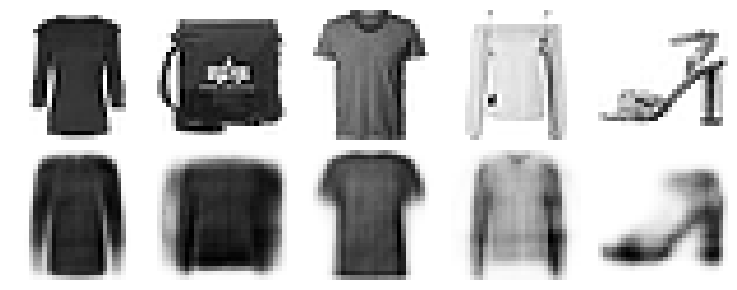

In [ ]:
show_reconstructions(stacked_ae)
save_fig("reconstruction_plot")

# Visualizando Fashion MNIST con tsne desde espacio latente del encoder

In [ ]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min()) #normalizar rango dinamico

157/157 [==============================] - 0s 1ms/step


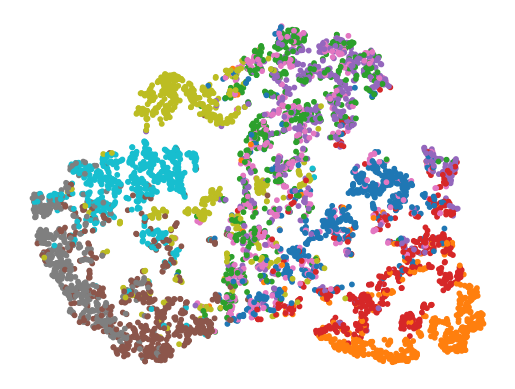

In [ ]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

Saving figure fashion_mnist_visualization_plot


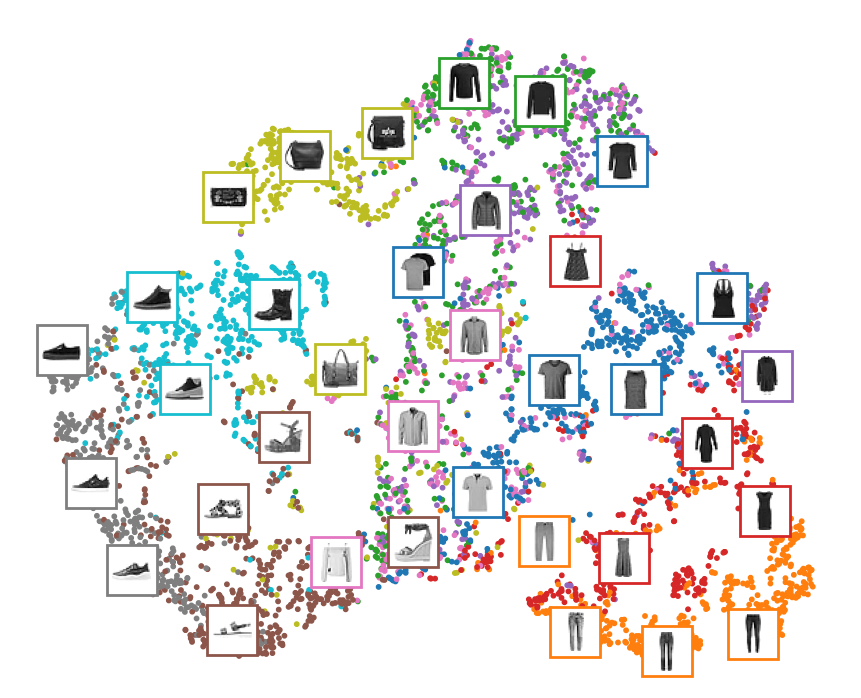

In [ ]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.01: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()

## Tying weights (relacionadar pesos  en encoder y decoder)

Se fijan los pesos del decoder como la transpuesta de los pesos del encoder (relacón directa con pca como reconstructor).

In [ ]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                             kernel_regularizer=keras.regularizers.l1_l2(l1=0.0001, l2=0.0001))
dropout_1 = keras.layers.Dropout(0.2)
dense_2 = keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                             kernel_regularizer=keras.regularizers.l2(l2=0.0001))

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dropout_1,
    dense_2,
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="mean_absolute_error",
                optimizer=keras.optimizers.Adam(lr=0.001),
                metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=15,
                      validation_data=(X_valid, X_valid))

Epoch 1/15
1719/1719 [==============================] - 9s 4ms/step - loss: 0.1685 - rounded_accuracy: 0.8518 - val_loss: 0.1410 - val_rounded_accuracy: 0.8766
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1377 - rounded_accuracy: 0.8834 - val_loss: 0.1327 - val_rounded_accuracy: 0.8915
Epoch 3/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1312 - rounded_accuracy: 0.8924 - val_loss: 0.1258 - val_rounded_accuracy: 0.8985
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1285 - rounded_accuracy: 0.8954 - val_loss: 0.1250 - val_rounded_accuracy: 0.8999
Epoch 5/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1273 - rounded_accuracy: 0.8969 - val_loss: 0.1236 - val_rounded_accuracy: 0.9016
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1263 - rounded_accuracy: 0.8979 - val_loss: 0.1230 - val_rounded_accuracy: 0.9013
Epoch 7/15
1719/1719 [==================

1/1 [==============================] - 0s 69ms/step


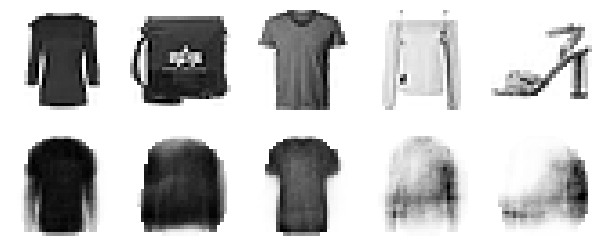

In [ ]:
show_reconstructions(tied_ae)
plt.show()

## Training one Autoencoder at a Time

In [ ]:
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer,
                      n_epochs=10, output_activation=None, metrics=None):
    n_inputs = X_train.shape[-1]
    encoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])
    ])
    decoder = keras.models.Sequential([
        keras.layers.Dense(n_inputs, activation=output_activation),
    ])
    autoencoder = keras.models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer, loss, metrics=metrics)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

K = keras.backend
X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, "binary_crossentropy",
    keras.optimizers.SGD(lr=1.5), output_activation="sigmoid",
    metrics=[rounded_accuracy])
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, "mse", keras.optimizers.SGD(lr=0.05),
    output_activation="selu")

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6625 - rounded_accuracy: 0.6014 - val_loss: 0.6196 - val_rounded_accuracy: 0.6790
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5742 - rounded_accuracy: 0.7129 - val_loss: 0.5400 - val_rounded_accuracy: 0.7319
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5219 - rounded_accuracy: 0.7449 - val_loss: 0.5126 - val_rounded_accuracy: 0.7521
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5039 - rounded_accuracy: 0.7595 - val_loss: 0.5005 - val_rounded_accuracy: 0.7629
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4929 - rounded_accuracy: 0.7700 - val_loss: 0.4902 - val_rounded_accuracy: 0.7731
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4824 - rounded_accuracy: 0.7804 - val_loss: 0.4796 - val_rounded_accuracy: 0.7833
Epoch 7/10
1719/1719 [==================

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2070 - val_loss: 0.0731
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0650 - val_loss: 0.0601
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0560 - val_loss: 0.0534
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0504 - val_loss: 0.0487
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0463 - val_loss: 0.0451
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0432 - val_loss: 0.0423
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0407 - val_loss: 0.0400
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0386 - val_loss: 0.0381
Epoch 9/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0369 - val_loss: 0.0365
Epoch 10/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.035

In [ ]:
stacked_ae_1_by_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

1/1 [==============================] - 0s 102ms/step


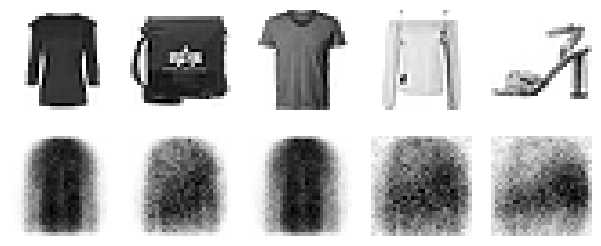

In [ ]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

In [ ]:
stacked_ae_1_by_1.compile(loss="binary_crossentropy",
                          optimizer=keras.optimizers.SGD(lr=0.1), metrics=[rounded_accuracy])
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=10,
                                validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4227 - rounded_accuracy: 0.8225 - val_loss: 0.4162 - val_rounded_accuracy: 0.8273
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4055 - rounded_accuracy: 0.8342 - val_loss: 0.4017 - val_rounded_accuracy: 0.8374
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3932 - rounded_accuracy: 0.8427 - val_loss: 0.3914 - val_rounded_accuracy: 0.8448
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3844 - rounded_accuracy: 0.8493 - val_loss: 0.3840 - val_rounded_accuracy: 0.8506
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3782 - rounded_accuracy: 0.8544 - val_loss: 0.3786 - val_rounded_accuracy: 0.8554
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3735 - rounded_accuracy: 0.8586 - val_loss: 0.3745 - val_rounded_accuracy: 0.8591
Epoch 7/10
1719/1719 [==================

1/1 [==============================] - 0s 65ms/step


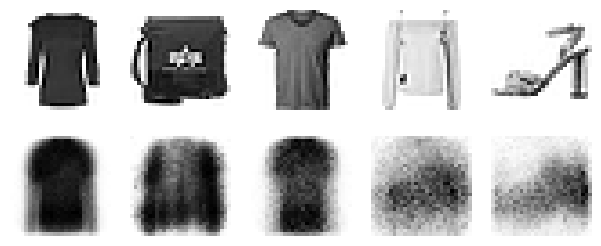

In [ ]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

## Autoencoders con CNNs

Nota: Para el decoder se debe incluir la operación de deconvolución o convolución transpuesta

![cnn](https://i.stack.imgur.com/YyCu2.gif)

![tcnn](https://i.stack.imgur.com/f2RiP.gif)


*   Hubo mejoras significativas al usar la funcion de optimizacoin Adam en ves de SGD:Adam mejora el rendimiento en comparación con SGD principalmente porque ajusta la tasa de aprendizaje automáticamente para cada parámetro, facilitando un entrenamiento más rápido y efectivo, especialmente en problemas complejos y con conjuntos de datos grandes.

*   No hubo cambios significativos al usar la funcion de loss mse ni mae: puede deberse a que el modelo ya está optimizado para la tarea.

*   No hubo cambios significativos al incluir Batch Normalization en la estructura: La inclusión de Batch Normalization podría no haber impactado significativamente debido a que el modelo ya estaba funcionando eficientemente, o las condiciones del conjunto de datos y la arquitectura específica no se beneficiaron sustancialmente de la normalización.

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=["mae", "mse"])

history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))


Epoch 1/5
1719/1719 [==============================] - 18s 9ms/step - loss: 0.2911 - mae: 0.0685 - mse: 0.0163 - val_loss: 0.2743 - val_mae: 0.0521 - val_mse: 0.0103
Epoch 2/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2692 - mae: 0.0482 - mse: 0.0091 - val_loss: 0.2682 - val_mae: 0.0458 - val_mse: 0.0083
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2649 - mae: 0.0436 - mse: 0.0077 - val_loss: 0.2649 - val_mae: 0.0421 - val_mse: 0.0072
Epoch 4/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2624 - mae: 0.0409 - mse: 0.0069 - val_loss: 0.2628 - val_mae: 0.0400 - val_mse: 0.0066
Epoch 5/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2608 - mae: 0.0391 - mse: 0.0063 - val_loss: 0.2617 - val_mae: 0.0388 - val_mse: 0.0062


In [ ]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_17 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)        

1/1 [==============================] - 0s 173ms/step


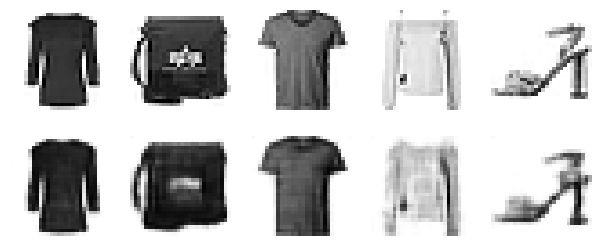

In [ ]:
show_reconstructions(conv_ae)
plt.show()

# Stacked denoising Autoencoder

Se busca regularizar mediante ruido, generalmente Gaussiano, o aplicando dropout

Utilizando ruido Gaussiano:

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2), #std
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3475 - rounded_accuracy: 0.8794 - val_loss: 0.3173 - val_rounded_accuracy: 0.9088
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3115 - rounded_accuracy: 0.9100 - val_loss: 0.3074 - val_rounded_accuracy: 0.9168
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3052 - rounded_accuracy: 0.9156 - val_loss: 0.3024 - val_rounded_accuracy: 0.9189
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3018 - rounded_accuracy: 0.9185 - val_loss: 0.2995 - val_rounded_accuracy: 0.9222
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2992 - rounded_accuracy: 0.9206 - val_loss: 0.2975 - val_rounded_accuracy: 0.9231
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2972 - rounded_accuracy: 0.9223 - val_loss: 0.2957 - val_rounded_accuracy: 0.9266
Epoch 7/10
1719/1719 [==================

1/1 [==============================] - 0s 70ms/step


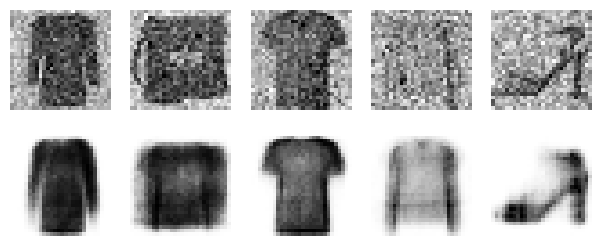

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

Con dropout:

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                   metrics=[rounded_accuracy])
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3557 - rounded_accuracy: 0.8714 - val_loss: 0.3209 - val_rounded_accuracy: 0.9042
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3190 - rounded_accuracy: 0.9025 - val_loss: 0.3123 - val_rounded_accuracy: 0.9103
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3132 - rounded_accuracy: 0.9071 - val_loss: 0.3076 - val_rounded_accuracy: 0.9144
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3095 - rounded_accuracy: 0.9101 - val_loss: 0.3044 - val_rounded_accuracy: 0.9178
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3066 - rounded_accuracy: 0.9124 - val_loss: 0.3016 - val_rounded_accuracy: 0.9197
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3046 - rounded_accuracy: 0.9142 - val_loss: 0.3011 - val_rounded_accuracy: 0.9173
Epoch 7/10
1719/1719 [==================

1/1 [==============================] - 0s 64ms/step
Saving figure dropout_denoising_plot


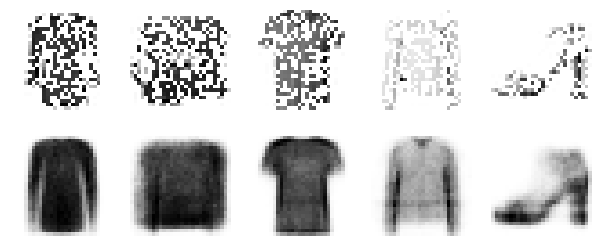

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))
save_fig("dropout_denoising_plot", tight_layout=False)

# Sparse Autoencoder

- Busca disminuir la cantidad de neuranas activas en el encoder.
- Se usa una sigmoid en el encoder con regularización l1
- Otras alternativas incluyen el mse con l1 y l2, o incluso la Divergencia KL sobre las activaciones de las neuronas para regularizar (sparse).

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

simple_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="sigmoid"),
])
simple_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
simple_ae = keras.models.Sequential([simple_encoder, simple_decoder])
simple_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.),
                  metrics=[rounded_accuracy])
history = simple_ae.fit(X_train, X_train, epochs=10,
                        validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4243 - rounded_accuracy: 0.8033 - val_loss: 0.3746 - val_rounded_accuracy: 0.8524
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3601 - rounded_accuracy: 0.8697 - val_loss: 0.3543 - val_rounded_accuracy: 0.8791
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3406 - rounded_accuracy: 0.8869 - val_loss: 0.3355 - val_rounded_accuracy: 0.8893
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3273 - rounded_accuracy: 0.8973 - val_loss: 0.3246 - val_rounded_accuracy: 0.9004
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3206 - rounded_accuracy: 0.9022 - val_loss: 0.3205 - val_rounded_accuracy: 0.9043
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3173 - rounded_accuracy: 0.9046 - val_loss: 0.3188 - val_rounded_accuracy: 0.9004
Epoch 7/10
1719/1719 [==================

1/1 [==============================] - 0s 60ms/step


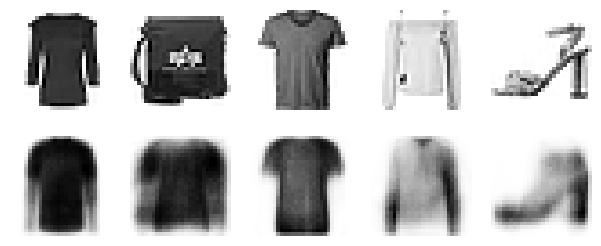

In [ ]:
show_reconstructions(simple_ae)
plt.show()

Cálculo de histogramas para revisar la frecuencia de activación:

In [ ]:
def plot_percent_hist(ax, data, bins):
    counts, _ = np.histogram(data, bins=bins)
    widths = bins[1:] - bins[:-1]
    x = bins[:-1] + widths / 2
    ax.bar(x, counts / len(data), width=widths*0.8)
    ax.xaxis.set_ticks(bins)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, position: "{}%".format(int(np.round(100 * y)))))
    ax.grid(True)

In [ ]:
def plot_activations_histogram(encoder, height=1, n_bins=10):
    X_valid_codings = encoder(X_valid).numpy()
    activation_means = X_valid_codings.mean(axis=0)
    mean = activation_means.mean()
    bins = np.linspace(0, 1, n_bins + 1)

    fig, [ax1, ax2] = plt.subplots(figsize=(10, 3), nrows=1, ncols=2, sharey=True)
    plot_percent_hist(ax1, X_valid_codings.ravel(), bins)
    ax1.plot([mean, mean], [0, height], "k--", label="Overall Mean = {:.2f}".format(mean))
    ax1.legend(loc="upper center", fontsize=14)
    ax1.set_xlabel("Activation")
    ax1.set_ylabel("% Activations")
    ax1.axis([0, 1, 0, height])
    plot_percent_hist(ax2, activation_means, bins)
    ax2.plot([mean, mean], [0, height], "k--")
    ax2.set_xlabel("Neuron Mean Activation")
    ax2.set_ylabel("% Neurons")
    ax2.axis([0, 1, 0, height])

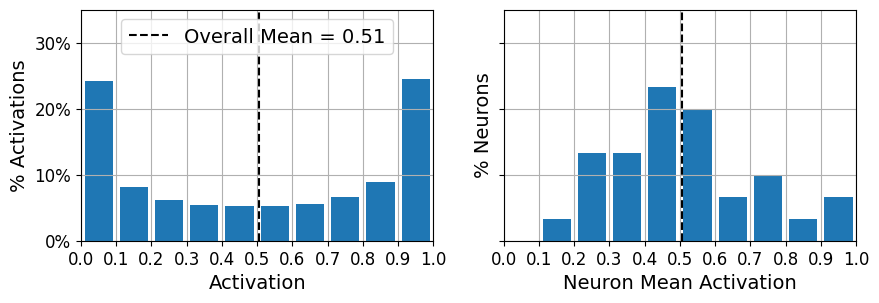

In [ ]:
plot_activations_histogram(simple_encoder, height=0.35)
plt.show()

Con regularización l1:

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4316 - rounded_accuracy: 0.8148 - val_loss: 0.3829 - val_rounded_accuracy: 0.8525
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3704 - rounded_accuracy: 0.8678 - val_loss: 0.3708 - val_rounded_accuracy: 0.8741
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3575 - rounded_accuracy: 0.8773 - val_loss: 0.3559 - val_rounded_accuracy: 0.8730
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3465 - rounded_accuracy: 0.8856 - val_loss: 0.3440 - val_rounded_accuracy: 0.8876
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3381 - rounded_accuracy: 0.8915 - val_loss: 0.3360 - val_rounded_accuracy: 0.8940
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3311 - rounded_accuracy: 0.8971 - val_loss: 0.3300 - val_rounded_accuracy: 0.8992
Epoch 7/10
1719/1719 [==================

1/1 [==============================] - 0s 74ms/step


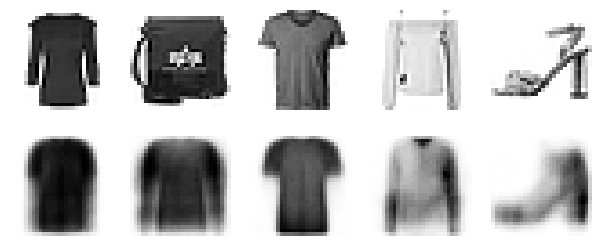

In [ ]:
show_reconstructions(sparse_l1_ae)

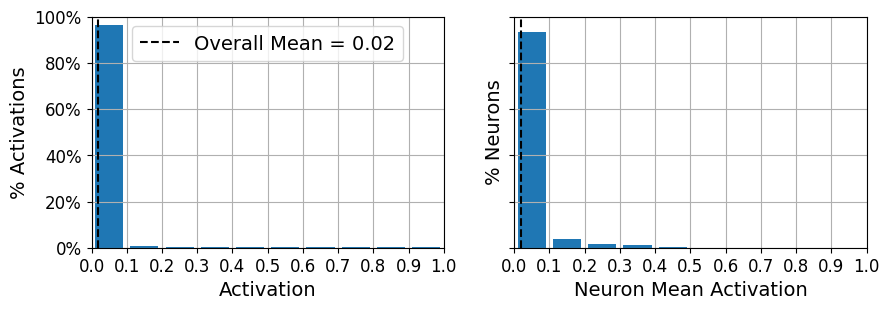

In [ ]:
plot_activations_histogram(sparse_l1_encoder, height=1.)
plt.show()

Aplicar la divergencia KL para asegurar un 10% de sparsity

Saving figure sparsity_loss_plot


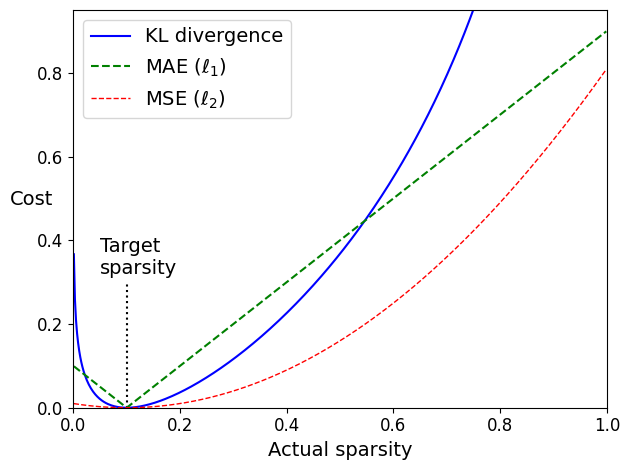

In [ ]:
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
mse = (p - q)**2
mae = np.abs(p - q)
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nsparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Actual sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 0.95])
save_fig("sparsity_loss_plot")

In [ ]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])
sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])
sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
              metrics=[rounded_accuracy])
history = sparse_kl_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.4170 - rounded_accuracy: 0.8097 - val_loss: 0.3709 - val_rounded_accuracy: 0.8575
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3501 - rounded_accuracy: 0.8791 - val_loss: 0.3407 - val_rounded_accuracy: 0.8888
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3304 - rounded_accuracy: 0.8957 - val_loss: 0.3260 - val_rounded_accuracy: 0.9006
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3204 - rounded_accuracy: 0.9036 - val_loss: 0.3199 - val_rounded_accuracy: 0.9053
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3157 - rounded_accuracy: 0.9075 - val_loss: 0.3159 - val_rounded_accuracy: 0.9088
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3125 - rounded_accuracy: 0.9103 - val_loss: 0.3130 - val_rounded_accuracy: 0.9104
Epoch 7/10
1719/1719 [================

1/1 [==============================] - 0s 147ms/step


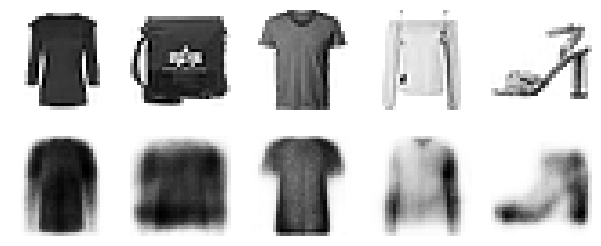

In [ ]:
show_reconstructions(sparse_kl_ae)

Saving figure sparse_autoencoder_plot


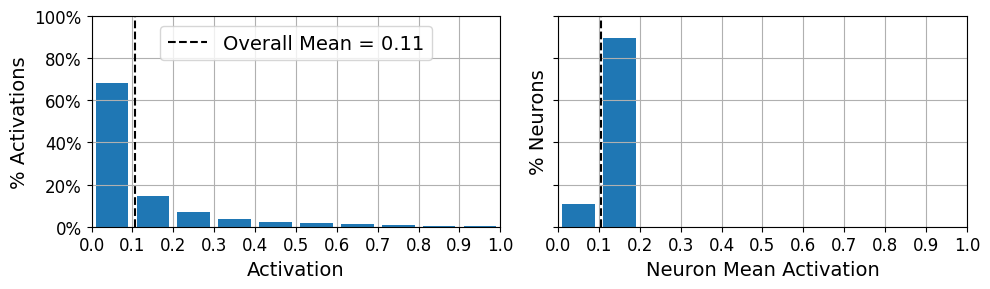

In [ ]:
plot_activations_histogram(sparse_kl_encoder)
save_fig("sparse_autoencoder_plot")
plt.show()

# [Variational Autoencoder](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73)



Traditional Autoencoders deconstruct input data into a latent representation, and then using this latent space they reconstruct the original data. During this process, the Neural Network discovers which features are the most important for the reconstruction process and which ones can be ignored.
<div>
<img src=https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-030-31756-0_4/MediaObjects/480626_1_En_4_Fig2_HTML.png>
</div>

However, there are issues associated with the Latent Space: This latent space is not necesarily continuous between classes, and as such if a new data point lands in between classes, the network won't be able to handle it and will produce a garbage output.
<div>
<img src=https://miro.medium.com/v2/resize:fit:1400/1*xCjoga9IPyNUSiz9E7ao7A.png>
</div>

To solve this issue, Variational Autoencoders (VAE) try to force the latent space to a known probability distribution

The encoder normally produces a latent space, but in a VAE, the encoder produces a latent distribution $q(z|x)$, we then sample this distribution to create our latent space and reconstruct as normal.

<div>
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*ejNnusxYrn1NRDZf4Kg2lw@2x.png" style="background-color:white;"/>
</div>




This latent distribution is compared to our posterior distribution $p(z|x)$ and through the cost function the goal is to minimize the difference between them.
$$q(z|x) ≈ p(z|x)$$

There is one big issue with this approach, thanks to Bayes' Theorem we know
$$p(z|x) = \frac{p(x|z)p(z)}{p(x)}$$
Where $p(x|z)$ is our reconstruction likelihood

$p(z)$ is our prior known distribution

and $p(x)$ is the evidence

Calculating the evidence turns out to be imposible due to the intractable nature of the evidence.
$$p(x) = ∫p(x|z)p(z)dz$$

At some point we need to find a way to estimate this evidence. Let's take a step back however, and get as far as we can calculating $q(z|x) ≈ p(z|x)$. We know the Kullback-Leibler divergence acts as a pseudo-distance for probability density functions, so we can use it to estimate the difference between $q$ and $p$

$$D_{kl}(q||p) = 𝔼_q\{log\begin{pmatrix}\frac{q(z|x)}{p(z|x)}\end{pmatrix}\}$$
Since we know the evidence can't be calculated, let's manipulate the formula to try and isolate it. We know the $log$ of a quotient is equals to the difference between $logs$:

$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x) - log(p(z|x)\}$$


The Expectancy of a sum/subtraction is the sum/substraction of the expetancies:
$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(z|x)\}$$
Applying Bayes' Theorem to p(z|x):
$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log\begin{pmatrix}\frac{p(x|z)p(z)}{p(x)}\end{pmatrix}\}$$
Once again separating the $log$ into a difference and splitting the Expectancy we get:
$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - (𝔼_q\{log(p(x|z)p(z))\} - 𝔼_q\{log(p(x))\})$$
$$= 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(x|z)p(z))\} + 𝔼_q\{log(p(x))\}$$

Now we expand $𝔼_q\{log(p(x))\}$ and get:

$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(x|z)p(z))\} + \int q(z|x)log(p(x))dz$$
Since our evidence isn't in terms of $z$, we can pull it out of the integral:
$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(x|z)p(z))\} + log(p(x))\int q(z|x)dz$$
and by definition, the integral of any density function is 1, so:
$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(x|z)p(z))\} + log(p(x))\times 1$$
$$= 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(x|z)p(z))\} + log(p(x))$$

Now we can estimate our evidence $p(x)$ by isolating it:

$$log(p(x)) = D_{kl}(q||p) + 𝔼_q\{log(p(x|z)p(z))\} - 𝔼_q\{log(q(z|x)\}$$

We can't calculate $D_{kl}(q||p)$ as discussed earlier, but we also know, since it is a pseudo-distance, that it will always be greater or equal to $0$, so we can estimate our evidence as:

$$log(p(x)) \geq 𝔼_q\{log(p(x|z)p(z))\} - 𝔼_q\{log(q(z|x)\}$$

This is what's known as the **Evidence Lower Bound (ELBO)**, and it tells us that by maximizing $𝔼_q\{log(p(x|z)p(z))\} - 𝔼_q\{log(q(z|x)\}$ we can not only approximate $p(x)$, but also minimize $D_{kl}(q||p)$. Now let us manipulate it a little bit more to make it easier to use:

$$ELBO = 𝔼_q\{log(p(x|z)p(z))\} - 𝔼_q\{log(q(z|x)\}$$
The $log$ of a product is the sum of the $logs$:
$$ELBO = 𝔼_q\{log(p(x|z)) + log(p(z))\} - 𝔼_q\{log(q(z|x)\}$$
Once again splitting the Expectancy:
$$ELBO = 𝔼_q\{log(p(x|z))\} + 𝔼_q\{log(p(z))\} - 𝔼_q\{log(q(z|x)\}$$
Now we reorder the equation:
$$ELBO = 𝔼_q\{log(p(x|z))\} - 𝔼_q\{log(q(z|x)\} + 𝔼_q\{log(p(z))\}$$
Factor the negative sign from the last two terms:
$$ELBO = 𝔼_q\{log(p(x|z))\} - (𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(z))\})$$
And finally we rejoin the Expectancy and the $logs$ for our last two terms:
$$ELBO = 𝔼_q\{log(p(x|z))\} - 𝔼_q\{log\begin{pmatrix}\frac{q(z|x)}{p(z)}\end{pmatrix}\}$$

In this form we can easily see how our first term represents the negative crossentropy between $q(z|x)$ and $p(x|z)$, while the second represent the Kullback-Leibler divergence for our encoder output $q(z|x)$ and our known prior distribution $p(z)$. So maximizing the **ELBO** comes down to minimizing the reconstruction error and the KL Divergence between the latent distribution and our prior.

![vae](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*eRcdr8gczweQHk--1pZF9A@2x.png)

In [ ]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/25
430/430 [==============================] - 4s 6ms/step - loss: 0.4146 - rounded_accuracy: 0.8364 - val_loss: 0.3670 - val_rounded_accuracy: 0.8825
Epoch 2/25
430/430 [==============================] - 2s 6ms/step - loss: 0.3551 - rounded_accuracy: 0.8890 - val_loss: 0.3496 - val_rounded_accuracy: 0.8909
Epoch 3/25
430/430 [==============================] - 3s 6ms/step - loss: 0.3439 - rounded_accuracy: 0.8971 - val_loss: 0.3430 - val_rounded_accuracy: 0.8946
Epoch 4/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3381 - rounded_accuracy: 0.9012 - val_loss: 0.3359 - val_rounded_accuracy: 0.9053
Epoch 5/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3340 - rounded_accuracy: 0.9042 - val_loss: 0.3352 - val_rounded_accuracy: 0.9050
Epoch 6/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3308 - rounded_accuracy: 0.9066 - val_loss: 0.3320 - val_rounded_accuracy: 0.9087
Epoch 7/25
430/430 [==============================] 

1/1 [==============================] - 0s 111ms/step


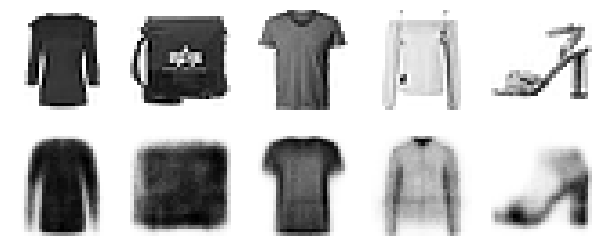

In [ ]:
show_reconstructions(variational_ae)
plt.show()

## Generate Fashion Images

In [ ]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

Se generan puntos en el espacio latente y se reconstruyen las imágenes:

Saving figure vae_generated_images_plot


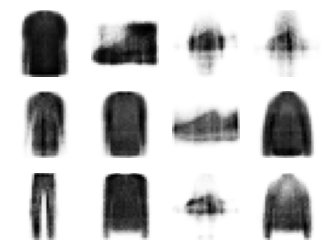

In [ ]:
tf.random.set_seed(42)

codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
save_fig("vae_generated_images_plot", tight_layout=False)

Interpolación semántica: se pasan las imágenes por el encoder, se interpolan los dos puntos en el espacio latente, y la interpolación en el espacio latente se pasa por el decoder.

Saving figure semantic_interpolation_plot


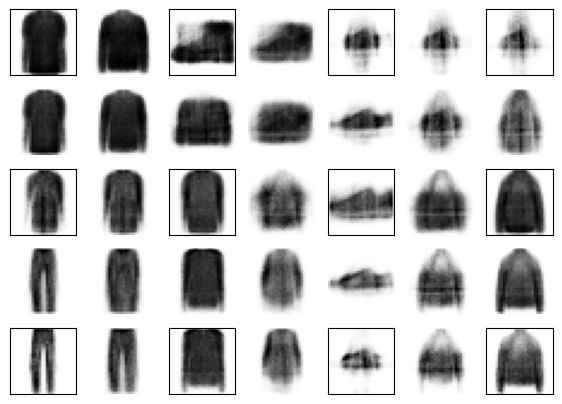

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
    plt.subplot(5, 7, index + 1)
    if index%7%2==0 and index//7%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(image, cmap="binary")
save_fig("semantic_interpolation_plot", tight_layout=False)

# [Generative Adversarial Networks (GANs)](https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29)

Variational autoencoders fueron y son muy populares, pero las GANs surgen como una alternativa para generar imágenes más realistas.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False # despues de compilar discriminator se entrena si se llama su .fit o su train_on_batch, no se  entrena en metodos de gan
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)
        plt.show()

Epoch 1/1


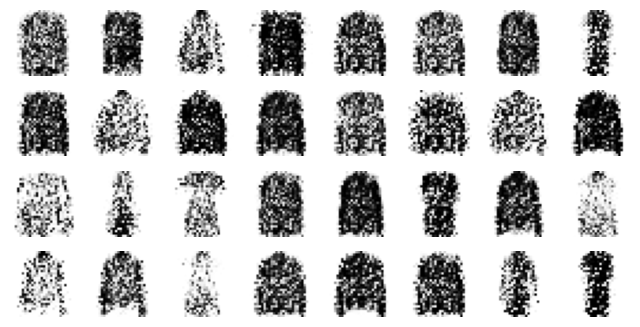

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

Saving figure gan_generated_images_plot


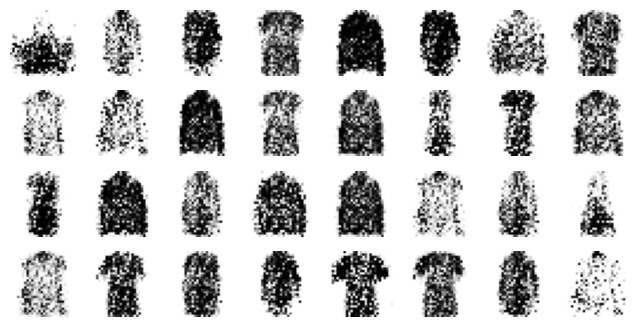

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)
save_fig("gan_generated_images_plot", tight_layout=False)

Epoch 1/50


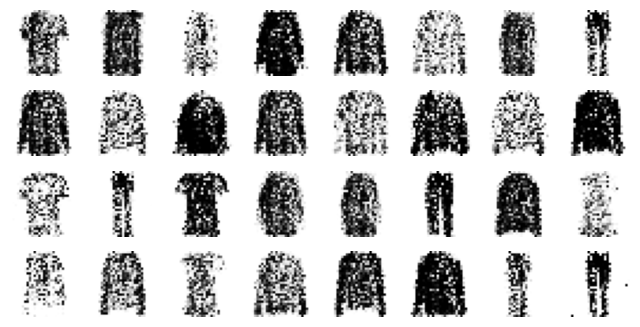

Epoch 2/50


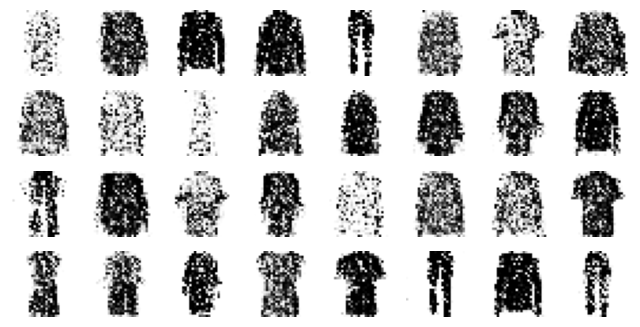

Epoch 3/50


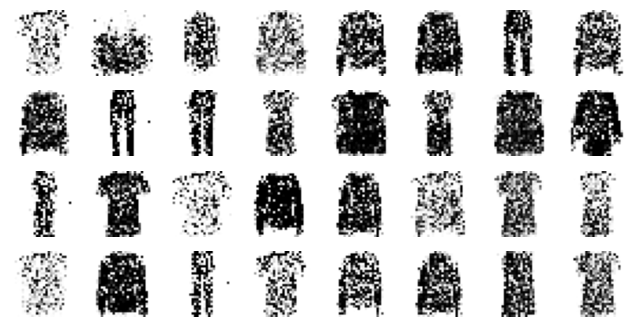

Epoch 4/50


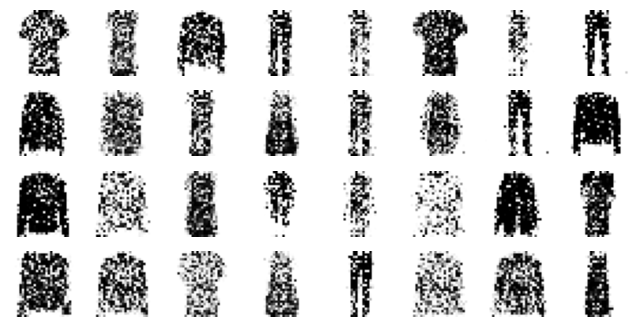

Epoch 5/50


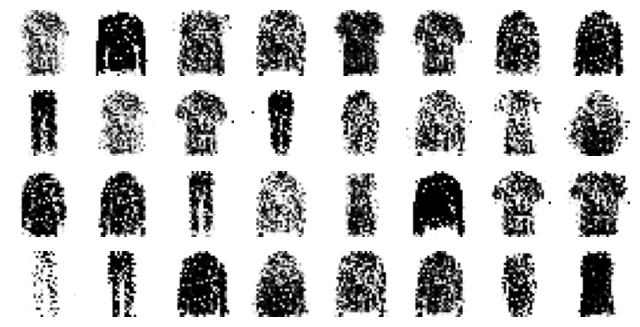

Epoch 6/50


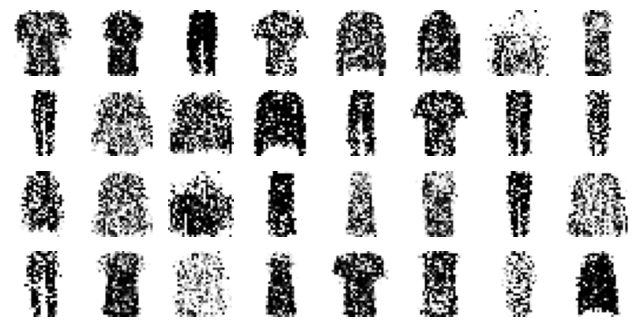

Epoch 7/50


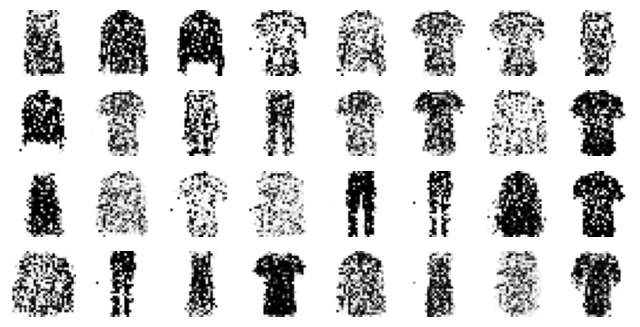

Epoch 8/50


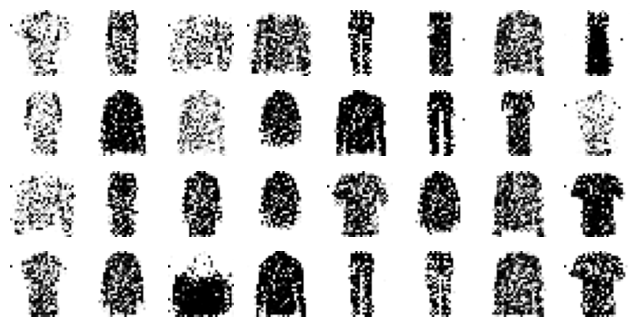

Epoch 9/50


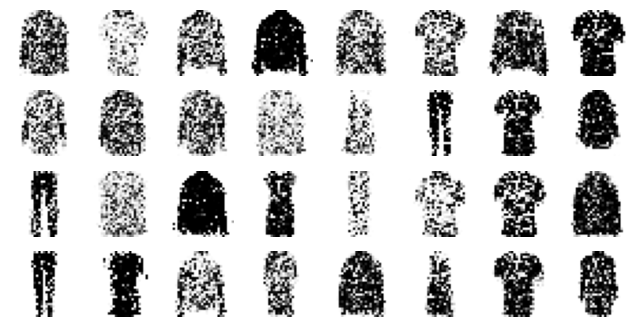

Epoch 10/50


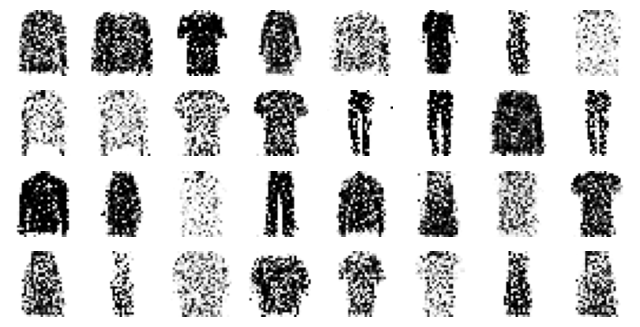

Epoch 11/50


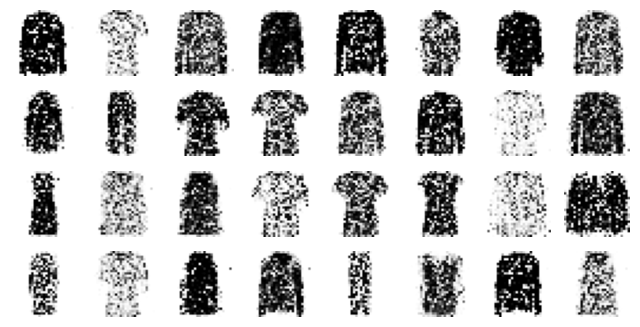

Epoch 12/50


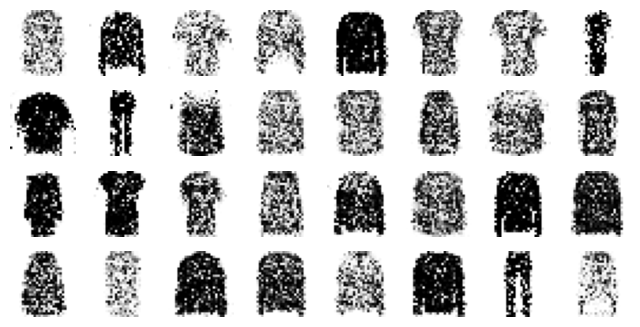

Epoch 13/50


KeyboardInterrupt: 

In [ ]:
train_gan(gan, dataset, batch_size, codings_size)


# Deep Convolutional GAN

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)
save_fig("dcgan_generated_images_plot", tight_layout=False)